In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt   # 그림그리기 위한 import
import sys

## 단순선형회귀
참고: https://tykimos.github.io/2017/03/25/Fit_Talk/
참고: https://docs.google.com/presentation/d/1WF5yphSXyzYLG8wmVvOpRmgAlw4vewbK51ZwLAOFZXk/edit#slide=id.g1d2206496a_0_246

74.666664
70.98
67.386665
63.88667
60.479992
57.166668
53.946674
50.819996
47.78667
44.84666
42.0
39.246666
36.586662
34.020004
31.546667
29.166666
26.88
24.686666
22.58667
20.58
18.666666
16.846666
15.12
13.486667
11.946668
10.5
9.146666
7.886667
6.72
5.646666
4.6666665
3.78
2.986667
2.2866664
1.68
1.1666666
0.7466666
0.42000008
0.18666662
0.04666671
0.0
0.04666671
0.18666674
0.41999987
0.7466665
1.1666666
1.6800003
2.2866673
2.986666
3.7799995
4.6666665
5.646666
6.720001
7.8866653
9.146668
10.5
11.946666
13.486669
15.119998
16.84667
18.666666
20.579996
22.58667
24.686666
26.880005
29.166666
31.546661
34.020004
36.586662
39.24667
42.0
44.84666
47.786663
50.820007
53.946674
57.166668
60.479992
63.886658
67.386665
70.98


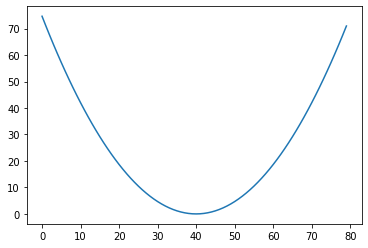

In [8]:
# 데이터준비

# train이면 입력값
x_train = [1,2,3]
y_train = [1,2,3]


# 가설준비 -> Wx+b
W = tf.placeholder(tf.float32)
hypot= W*x_train



# 비용함수(손실함수)   내가 얼마나 틀렸는지 알아야 보완할 수 있다. 
cost = tf.reduce_mean(tf.square(hypot-y_train))               # square는 제곱을 해주는 함수
                                                              # (hypot-y) -> 예측값-정답. 
                                                              # reduce_mean 
    
#---------------텐서플로우의 그래프작성완료----------------------------------




sess=tf.Session()
cost_val=[]

for i in range(-30,50):
    cost_result = sess.run(cost,feed_dict={W:i*0.1})                 # cost실행   W를 0.1 씩 조금씨 변경시켜서 확인
    print(cost_result)
    
    cost_val.append(cost_result)

plt.plot(cost_val)    
sess.close()    

### 경사하강 알고리즘을 이용한 가중치학습
https://docs.google.com/presentation/d/12raZrY3d244q6jGuC7EykeSPzjP1-FqofMiNlx5Q52o/edit#slide=id.g1d11dcbc39_0_0

In [13]:
# 데이터준비

# train이면 입력값
x_train = [1,2,3]
y_train = [1,2,3]


# 가설준비 -> Wx+b
W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

hypot=W*x_train+b


# 비용함수(손실함수)   내가 얼마나 틀렸는지 알아야 보완할 수 있다. 
cost = tf.reduce_mean(tf.square(hypot-y_train))               # square는 제곱을 해주는 함수
                                                              # (hypot-y) -> 예측값-정답. 
                                                              # reduce_mean 
    
    
    

# 최저 비용학습을 위한 경사 하강 알고리즘(Gradient Descent)    

alpha = 0.1
gradient = tf.reduce_mean((W*x_train -y_train)*x_train)
descent = W-alpha*gradient
update = W.assign(descent)     # W = descent
    
    
    
    
    
#---------------텐서플로우의 그래프작성완료----------------------------------




sess=tf.Session()
sess.run(tf.global_variables_initializer())



for step in range(21):
    _,c,w = sess.run([update,cost,W])
    print(step,c,w)
    
    

   
sess.close()    

0 0.059027273 [0.9830663]
1 0.073741734 [0.9909687]
2 0.082427315 [0.9951833]
3 0.08729792 [0.9974311]
4 0.0899634 [0.9986299]
5 0.09140423 [0.9992693]
6 0.092178226 [0.9996103]
7 0.092592515 [0.99979216]
8 0.09281395 [0.99988914]
9 0.092932135 [0.9999409]
10 0.09299523 [0.99996847]
11 0.09302888 [0.9999832]
12 0.09304684 [0.99999106]
13 0.09305648 [0.99999523]
14 0.093061544 [0.99999744]
15 0.09306425 [0.9999986]
16 0.09306571 [0.9999993]
17 0.09306649 [0.99999964]
18 0.09306695 [0.9999998]
19 0.09306716 [0.9999999]
20 0.0930672 [0.99999994]


In [17]:
# 데이터준비

# train이면 입력값
#x_train = tf.placeholder(tf.float32,shape=[5])    # 어떤 데이터가 들어올지 모르면 placeholder 이용
#y_train = tf.placeholder(tf.float32,shape=[5])


x_train = tf.placeholder(tf.float32,shape=[None])    # 어떤 데이터가 들어올지 모르면 placeholder 이용
y_train = tf.placeholder(tf.float32,shape=[None])



# 가설준비 -> Wx+b
W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

hypot=W*x_train+b


# 비용함수(손실함수)   내가 얼마나 틀렸는지 알아야 보완할 수 있다. 
cost = tf.reduce_mean(tf.square(hypot-y_train))               # square는 제곱을 해주는 함수
                                                              # hypot-y 제곱 합의 평균
    
    
    

# 최저 비용학습을 위한 경사 하강 알고리즘(Gradient Descent)    

train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    
    
    
    
#---------------텐서플로우의 그래프작성완료----------------------------------



sess=tf.Session()
sess.run(tf.global_variables_initializer())



for step in range(21):
    _,c,w = sess.run([train,cost,W],feed_dict={x_train:[1,2,3,4,5,6],
                                               y_train:[1,2,3,4,5,6]})
    
    
    print(step,c,w)
    
   
sess.close()    

0 61.997562 [-0.29942626]
1 28.694382 [0.11765191]
2 13.280673 [0.4013908]
3 6.146745 [0.59441686]
4 2.8449497 [0.7257295]
5 1.316779 [0.8150576]
6 0.60949594 [0.8758229]
7 0.28214338 [0.9171565]
8 0.13063456 [0.9452705]
9 0.060511377 [0.96439093]
10 0.028055815 [0.977393]
11 0.013034043 [0.9862325]
12 0.0060812104 [0.9922403]
13 0.0028628751 [0.9963217]
14 0.0013729645 [0.99909246]
15 0.0006830423 [1.0009717]
16 0.00036337576 [1.0022444]
17 0.0002150819 [1.0031043]
18 0.00014610896 [1.0036837]
19 0.000113844966 [1.0040721]
20 9.857714e-05 [1.0043305]


In [19]:
# 데이터준비

# train이면 입력값
#x_train = tf.placeholder(tf.float32,shape=[5])    # 어떤 데이터가 들어올지 모르면 placeholder 이용
#y_train = tf.placeholder(tf.float32,shape=[5])


x_train = tf.placeholder(tf.float32,shape=[None])    # 어떤 데이터가 들어올지 모르면 placeholder 이용
y_train = tf.placeholder(tf.float32,shape=[None])



# 가설준비 -> Wx+b
W = tf.Variable(tf.random_normal([1]),dtype=tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

hypot=W*x_train+b


# 비용함수(손실함수)   내가 얼마나 틀렸는지 알아야 보완할 수 있다. 
cost = tf.reduce_mean(tf.square(hypot-y_train))               # square는 제곱을 해주는 함수
                                                              # hypot-y 제곱 합의 평균
    
    
    

# 최저 비용학습을 위한 경사 하강 알고리즘(Gradient Descent)    

train=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    
    
    
    
#---------------텐서플로우의 그래프작성완료----------------------------------



sess=tf.Session()
sess.run(tf.global_variables_initializer())



for step in range(2000):
    _,c,w,b1 = sess.run([train,cost,W,b],feed_dict={x_train:[1,2,3,4,5],
                                               y_train:[2.1,3.1,4.1,5.1,6.1]})
    
    if step % 100 == 0:
        print(step,c,w,b1)

0 32.960926 [0.45458132] [-1.6276654]
100 0.53306067 [1.472406] [-0.6055362]
200 0.27077743 [1.3366926] [-0.11556698]
300 0.13754605 [1.239967] [0.23364307]
400 0.06986888 [1.1710289] [0.48253167]
500 0.03549116 [1.1218954] [0.6599187]
600 0.018028336 [1.0868771] [0.7863459]
700 0.009157812 [1.061919] [0.87645304]
800 0.0046518734 [1.0441308] [0.94067395]
900 0.0023629894 [1.0314529] [0.9864455]
1000 0.0012003232 [1.022417] [1.0190676]
1100 0.00060972094 [1.0159768] [1.0423183]
1200 0.00030971874 [1.0113871] [1.0588892]
1300 0.00015732707 [1.0081158] [1.0706995]
1400 7.9918354e-05 [1.0057842] [1.079117]
1500 4.0597177e-05 [1.0041226] [1.085116]
1600 2.062326e-05 [1.0029383] [1.0893916]
1700 1.0475496e-05 [1.0020941] [1.0924394]
1800 5.32108e-06 [1.0014925] [1.0946113]
1900 2.7032772e-06 [1.001064] [1.0961591]


In [22]:
# Testing
print(sess.run(hypot,feed_dict={x_train:[27]}))
print(sess.run(hypot,feed_dict={x_train:[2.5,3.7]}))
sess.close()

[28.117796]
[3.599155 4.800068]


In [23]:
# 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측하시오.

x_data=[1,2,3,4,5,6,7]y_data=[25000,55000,75000,110000,128000,155000,180000]

In [25]:

#W는 Weight(가중치). -100에서 100사이의 랜덤값  b는 bias y절편
W = tf.Variable(tf.random_uniform([1], -100, 100))
b = tf.Variable(tf.random_uniform([1], -100, 100))

#placeholder라는 하나의 틀
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#가설식
H = W*X + b

#비용함수 코스트는 (이상치-실제값)의 제곱의 평균
cost = tf.reduce_mean(tf.square(H-Y))

#경사 하강 알고리즘에서 한번에 얼만큼 점프할건지. step의 크기.
a = tf.Variable(0.01)
optimizer = tf.train.GradientDescentOptimizer(a)

#비용함수를 가장 적게 만드는 방법으로 학습.
train = optimizer.minimize(cost)

#변수 초기화
init = tf.global_variables_initializer()

#세션
sess = tf.Session()
sess.run(init)

#여기가 실제로 학습이 일어나는 부분
for i in range(5001):
    sess.run(train, feed_dict = {X : x_data, Y : y_data})
    if i & 500 ==0:
        print(i, sess.run(cost, feed_dict = {X:x_data, Y:y_data}), sess.run(W))
print (sess.run(H, feed_dict={X : [8]}))

0 4606047700.0 [10346.294]
1 1577480300.0 [16410.83]
2 545105860.0 [19952.734]
3 193182480.0 [22021.81]
8 11932110.0 [24737.824]
9 11361149.0 [24822.389]
10 11154214.0 [24872.885]
11 11071459.0 [24903.484]
512 8683344.0 [25541.21]
513 8682956.0 [25541.602]
514 8682572.0 [25541.99]
515 8682191.0 [25542.379]
520 8680313.0 [25544.295]
521 8679951.0 [25544.674]
522 8679587.0 [25545.05]
523 8679223.0 [25545.428]
1024 8633635.0 [25628.713]
1025 8633632.0 [25628.768]
1026 8633615.0 [25628.822]
1027 8633613.0 [25628.877]
1032 8633579.0 [25629.143]
1033 8633571.0 [25629.195]
1034 8633558.0 [25629.248]
1035 8633557.0 [25629.3]
1536 8632668.0 [25640.889]
1537 8632673.0 [25640.896]
1538 8632671.0 [25640.904]
1539 8632669.0 [25640.912]
1544 8632670.0 [25640.95]
1545 8632674.0 [25640.957]
1546 8632672.0 [25640.963]
1547 8632677.0 [25640.97]
2048 8632652.0 [25642.584]
2049 8632653.0 [25642.586]
2050 8632650.0 [25642.586]
2051 8632652.0 [25642.588]
2056 8632655.0 [25642.592]
2057 8632654.0 [25642.594]

### 다중선형회귀

In [26]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

In [30]:
# 단순하게 처리하는 경우
X1=tf.placeholder(tf.float32,shape=[None])
X2=tf.placeholder(tf.float32,shape=[None])
X3=tf.placeholder(tf.float32,shape=[None])



y=tf.placeholder(tf.float32,shape=[None])

In [35]:
# 가설준비
W1 = tf.Variable(tf.random_normal([1])) 
W2 = tf.Variable(tf.random_normal([1])) 
W3 = tf.Variable(tf.random_normal([1])) 

b = tf.Variable(tf.random_normal([1])) 

hypot = W1*X1 + W2*X2 + W3*X3 + b 



# 비용함수
cost = tf.reduce_mean(tf.square(hypot-y)) 


#최소비용계산
train=tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)




with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _,h,c = sess.run([train,hypot,cost],feed_dict={X1:x1_data,
                                                      X2:x2_data,
                                                      X3:x3_data,
                                                      y:y_data})
        
        if step % 100 == 0 :
            print(step,h,c)

0 [147.21495 176.10397 173.48004 191.34561 132.70782] 50.510735
100 [153.08412 183.29161 180.49332 198.98378 138.22266] 5.501709
200 [153.01578 183.33911 180.47324 198.9626  138.29059] 5.310209
300 [152.94934 183.38531 180.45372 198.94188 138.35683] 5.1283364
400 [152.88475 183.43027 180.43477 198.92155 138.42137] 4.9555864
500 [152.82199 183.47397 180.41641 198.90167 138.48428] 4.791561
600 [152.76096 183.51648 180.39856 198.88217 138.54562] 4.6356726
700 [152.70161 183.5578  180.38121 198.86308 138.6054 ] 4.487626
800 [152.64397 183.598   180.36438 198.84438 138.66368] 4.3469095
900 [152.58792 183.63708 180.34805 198.82602 138.72047] 4.2132006
1000 [152.53345 183.67511 180.33221 198.80804 138.77585] 4.086107
1100 [152.48048 183.71205 180.3168  198.7904  138.82983] 3.965271
1200 [152.42903 183.74799 180.3019  198.77312 138.88246] 3.8503945
1300 [152.37901 183.78291 180.28738 198.75616 138.93376] 3.7411606
1400 [152.3304  183.8169  180.27333 198.73955 138.98378] 3.6372635
1500 [152.283

In [38]:
# matrix로 처리하는 경우
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]

y_data = [[152.], [185.], [180.], [196.], [142.]]


X=tf.placeholder(tf.float32,shape=[None,3])
y=tf.placeholder(tf.float32,shape=[None,1])




# 가설준비
W = tf.Variable(tf.random_normal([3,1])) 
b = tf.Variable(tf.random_normal([1])) 

hypot = tf.matmul(X,W) + b 



# 비용함수
cost = tf.reduce_mean(tf.square(hypot-y)) 



#최소비용계산
train=tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)




with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        _,h,c = sess.run([train,hypot,cost],feed_dict={X:x_data,
                                                      y:y_data})
        
        if step % 100 == 0 :
            print(step,h,c)


0 [[ 6.287401]
 [25.569351]
 [15.903599]
 [18.267578]
 [23.042233]] 23863.537
100 [[143.48021]
 [190.06615]
 [178.19266]
 [194.97072]
 [148.43388]] 28.794687
200 [[143.68594]
 [189.92532]
 [178.25595]
 [195.01465]
 [148.25064]] 27.293097
300 [[143.88618]
 [189.78822]
 [178.31755]
 [195.05736]
 [148.0723 ]] 25.870611
400 [[144.0811 ]
 [189.65479]
 [178.37749]
 [195.09889]
 [147.89873]] 24.523106
500 [[144.27083]
 [189.52492]
 [178.43587]
 [195.1393 ]
 [147.72986]] 23.246716
600 [[144.4555 ]
 [189.3985 ]
 [178.49269]
 [195.17857]
 [147.5655 ]] 22.037556
700 [[144.63525]
 [189.27545]
 [178.548  ]
 [195.21675]
 [147.40558]] 20.892206
800 [[144.81023]
 [189.15569]
 [178.60184]
 [195.25388]
 [147.24995]] 19.80723
900 [[144.98053]
 [189.03912]
 [178.65425]
 [195.28998]
 [147.09853]] 18.779522
1000 [[145.14632]
 [188.92564]
 [178.70528]
 [195.32509]
 [146.95116]] 17.805885
1100 [[145.30768]
 [188.81523]
 [178.75496]
 [195.3592 ]
 [146.80775]] 16.88368
1200 [[145.46475]
 [188.70772]
 [178.80331

## DASK
      1. 가상 데이터 프레임
      2. 병렬 처리용 작업 스케줄러

In [45]:
%%writefile 'data/sample1.csv'
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing data/sample1.csv


In [47]:
df1=pd.read_csv('data/sample1.csv')
df1
df1[' c2'].mean()

2.22

In [54]:
df1[' c2']=100
df1

,c1,c2,c3
0,1,100,one
1,2,100,two
2,3,100,three


In [48]:
import dask.dataframe as dd

In [49]:
df2 = dd.read_csv('data/sample1.csv')
df2

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [50]:
df2.head()

C:\Users\acorn\Anaconda3\lib\site-packages\dask\dataframe\core.py:5943: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [51]:
df2[' c2'].mean()

dd.Scalar<series-..., dtype=float64>

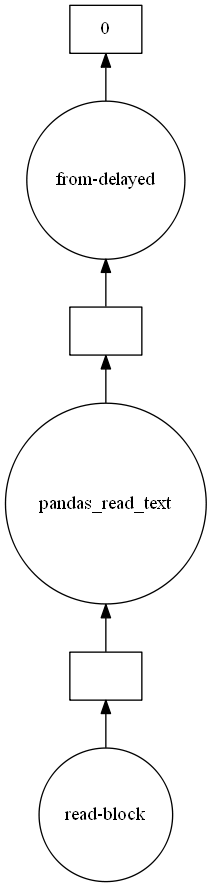

In [52]:
df2.visualize()

In [53]:
df2[' c2'].mean().compute()

2.22

In [57]:
df2[' c2']=100
df2.head()


C:\Users\acorn\Anaconda3\lib\site-packages\dask\dataframe\core.py:5943: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,100,one
1,2,100,two
2,3,100,three


In [68]:
%%writefile 'data/data1.csv'
time,temp,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59

Writing data/data1.csv


In [69]:
%%writefile 'data/data2.csv'
time,temp,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59

Writing data/data2.csv


In [67]:
%%writefile 'data/data3.csv'
time,temp,humidity
0,22,58
1,21,57
2,25,57
3,26,55
4,22,53
5,23,59

Writing data/data3.csv


In [73]:
df3=dd.read_csv('data/data*.csv')
df3
df3.count().compute()

time        18
temp        18
humidity    18
dtype: int64

In [74]:
df3.temp.describe().compute()

count    18.000000
mean     23.166667
std       1.823055
min      21.000000
25%      22.000000
50%      22.500000
75%      24.500000
max      26.000000
Name: temp, dtype: float64

In [75]:
# 대량 데이터의 병렬처리
df4=dd.read_csv('data/crime.csv',dtype=str,error_bad_lines=False,warn_bad_lines=False)

In [78]:
df4
df4.tail()

df4.count().compute()

ID                            724279
Case Number                   724279
Date                          724279
Block                         724279
IUCR                          724279
Primary Type                  724279
Description                   724279
Location Description          721598
Arrest                        724279
Domestic                      724279
Beat                          724279
District                      724278
Ward                          724267
Community Area                724277
FBI Code                      724279
X Coordinate                  715994
Y Coordinate                  715994
Year                          724279
Updated On                    724279
Latitude                      715994
Longitude                     715994
Location                      715994
Historical Wards 2003-2015    713711
Zip Codes                     715994
Community Areas               714015
Census Tracts                 714255
Wards                         714023
B

In [79]:
from dask.diagnostics import ProgressBar
pbar=ProgressBar()
pbar.register()

In [80]:
%%time
df4.count().compute()

[########################################] | 100% Completed |  3.4s
Wall time: 3.42 s


ID                            724279
Case Number                   724279
Date                          724279
Block                         724279
IUCR                          724279
Primary Type                  724279
Description                   724279
Location Description          721598
Arrest                        724279
Domestic                      724279
Beat                          724279
District                      724278
Ward                          724267
Community Area                724277
FBI Code                      724279
X Coordinate                  715994
Y Coordinate                  715994
Year                          724279
Updated On                    724279
Latitude                      715994
Longitude                     715994
Location                      715994
Historical Wards 2003-2015    713711
Zip Codes                     715994
Community Areas               714015
Census Tracts                 714255
Wards                         714023
B

In [ ]:
'''
Dask에서 제공하는 스케줄러
    - dask.get : 단일 쓰레드
    - dask.threaded.get : 멀티쓰레드 풀(pool)
    - dask.multiprocessing.get : 멀티 프로세스 풀
    - distributed.Client.get : 여러 대의 컴퓨터에서 분산 처리

'''

In [81]:
%%time
df4.count().compute(scheduler='processes',num_workers=4)


[########################################] | 100% Completed |  6.4s
Wall time: 6.42 s


ID                            724279
Case Number                   724279
Date                          724279
Block                         724279
IUCR                          724279
Primary Type                  724279
Description                   724279
Location Description          721598
Arrest                        724279
Domestic                      724279
Beat                          724279
District                      724278
Ward                          724267
Community Area                724277
FBI Code                      724279
X Coordinate                  715994
Y Coordinate                  715994
Year                          724279
Updated On                    724279
Latitude                      715994
Longitude                     715994
Location                      715994
Historical Wards 2003-2015    713711
Zip Codes                     715994
Community Areas               714015
Census Tracts                 714255
Wards                         714023
B

### Batch
      - Batch      : 전체 데이터
      - Stochastic : 1개 데이터
      - Mini-Batch : 적당한 크기로 쪼개는 것(?)
      
### Epoch
      - 알고리즘의 수행횟수

In [82]:
filename_queue = tf.train.string_input_producer(
    ['data/data-01-test-score.csv'], shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

xy

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.


[<tf.Tensor 'DecodeCSV:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:2' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV:3' shape=() dtype=float32>]

In [85]:
train_x_batch, train_y_batch=tf.train.batch([xy[0:-1],xy[-1:]],batch_size=10)
train_x_batch
train_y_batch

<tf.Tensor 'batch_2:1' shape=(10, 1) dtype=float32>

In [86]:
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coord = tf.train.Coordinator()
    threads=tf.train.start_queue_runners(sess=sess,coord=coord)
    
    for step in range(2001):
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
        sess.run(train,feed_dict={X:x_batch, y:y_batch})
        
    coord.request_stop()
    coord.join(threads)
    
    print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 70, 101]]}))

    print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[60, 70, 110], [90, 100, 80]]}))


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
